# MLB Postseason Pitcher Analysis - High School vs. College

Thousands of high school students enroll into colleges across the country every year in hopes of gaining an education to prepare them to enter a field they are interested in. Some of these students enrolling also gain collegiate experience into a different kind of field: a baseball field.

It has been reported that the living accomodations and diet of minor league baseball players is not always the best (this has come a long way over the years, however). On the other hand, collegiate baseball players benefit from being in programs with nutrition and strength training regimens and even, in some cases, next-gen technology to further develop skills. With that said, the purpose of this analysis is to determine if pitchers who chose to attend college fare better in the MLB Postseason (from 2010 to 2019) than those who decided to go professional right out of high school.

This data was pulled from a query run in SQL from data in the Sean Lahman Baseball Database. The data in this analysis comes from every MLB Postseason game played from 2010 to 2019. This date range was chosen to provide a sense of recency with the data. *Please note that the 2020 season is not in this analysis due to not being included in the database used. It may be beneficial not to include the 2020 season due to its unusual nature and limited number of games (COVID-19).*

To qualify, pitchers must have thrown at least 3 postseason innings. This innings threshold eliminates the occurrence of position players throwing an inning in the event of blowout games to preserve the bullpen. The pitchers who qualified then had their postseason stats in the time frame compiled individually, as seen in the data preview below.

The pitchers in this analysis are not limited to those from the United States. Players from countries outside of the US will be included, regardless of whether or not they attended college.

In [1]:
#importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read file

data = pd.read_csv('C:/Users/Ryan/Desktop/Baseball Analysis Projects/MLB Postseason Pitcher Stats 2010 to 2019.csv')

data.head(5) #preview file

,Name,College,ERA,Batting_Avg,Strikeouts,Innings_Pitched,Walks_Allowed,Hits_Allowed,Homeruns_Allowed,Int_Walks_Allowed,Hit_Batters,Games,Games_Started
0,A. J. Burnett,NaN,4.55,0.237,7,11,7,10,2,2,1,2,2
1,A. J. Griffin,University of San Diego,3.60,0.350,4,20,0,28,4,0,0,4,4
2,Aaron Sanchez,NaN,3.68,0.141,16,16,7,8,2,0,0,7,2
3,Adam Wainwright,NaN,3.76,0.253,93,86,15,85,9,1,1,17,13
4,Adam Warren,University of North Carolina at Chapel Hill,0.00,0.000,4,12,4,0,0,0,0,8,0


In [3]:
data.shape #use to get number of rows to validate player count

(320, 13)

## Cleaning Data

With our data now read in, we need to do some cleaning up.

We will start with filling in any null values in the College column to say "Non-College", then create a column called "School_Level" to output whether a pitcher attended college or not.

In [4]:
#fill null values in College column to 'High School'

data['College'] = data['College'].fillna('Non-College')

data = data.rename(columns = {'College':'School'}) #rename College column to School to reflect changes

In [5]:
#create schooling level column

data['School_Level'] = np.where(data['School'] == 'Non-College', 'Non-College', 'College')

In [6]:
#reorganize columns and remove columns not needed for this analysis

data = data[['Name', 'School', 'School_Level', 'ERA', 'Batting_Avg', 'Innings_Pitched', 'Games', 'Games_Started']]

In [7]:
data.head(5)

,Name,School,School_Level,ERA,Batting_Avg,Innings_Pitched,Games,Games_Started
0,A. J. Burnett,Non-College,Non-College,4.55,0.237,11,2,2
1,A. J. Griffin,University of San Diego,College,3.60,0.350,20,4,4
2,Aaron Sanchez,Non-College,Non-College,3.68,0.141,16,7,2
3,Adam Wainwright,Non-College,Non-College,3.76,0.253,86,17,13
4,Adam Warren,University of North Carolina at Chapel Hill,College,0.00,0.000,12,8,0


## Grouping

Now we will group by schooling level, then create a new DataFrame based on statistics we want for each group.

In [8]:
#grouping by school_level

school = data.groupby('School_Level')

In [9]:
#create function to plug column and get average rounded to specified decimals

def group_result(col, places):
    return round(school[col].mean(), places)

In [10]:
#getting group averages of each category

player_count = school['Name'].count() #count of high school and college pitchers total by group

era = group_result('ERA', 2)
batt_avg = group_result('Batting_Avg', 3)
innings = group_result('Innings_Pitched', 1)
games = group_result('Games', 1)
starts = group_result('Games_Started', 1)

In [11]:
#create dataframe of results

df = pd.DataFrame([player_count, era, batt_avg, innings, games, starts]).transpose()

In [12]:
df = df.rename(columns = {'Name':'Count'})

## Table of Results by Group

In [13]:
df #providing table of results for viewing

,Count,ERA,Batting_Avg,Innings_Pitched,Games,Games_Started
School_Level,,,,,,
College,126.0,3.01,0.200,48.6,18.0,6.6
Non-College,194.0,3.34,0.209,15.0,5.8,1.9


## Postseason Total Pitcher Count

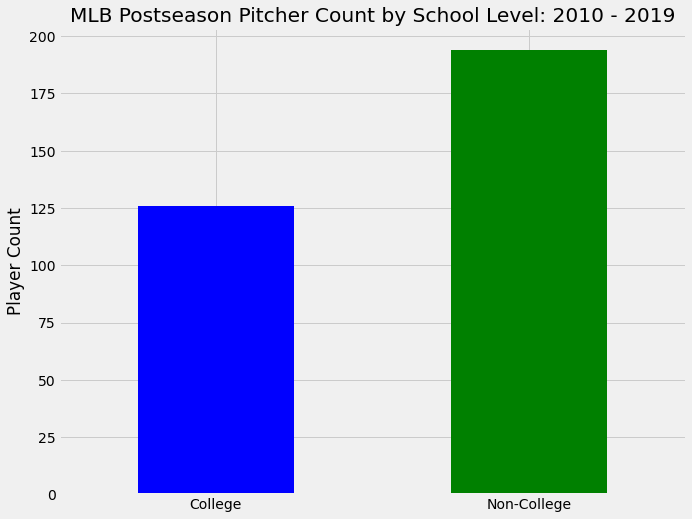

In [18]:
colors = ['blue', 'green'] #set colors for bars

player_count.plot.bar(title = 'MLB Postseason Pitcher Count by School Level: 2010 - 2019', rot=0, figsize = (10,8),
                      color = colors)
plt.style.use('fivethirtyeight')
plt.xlabel('')
plt.ylabel('Player Count')
plt.show()

## Postseason Innings Pitched

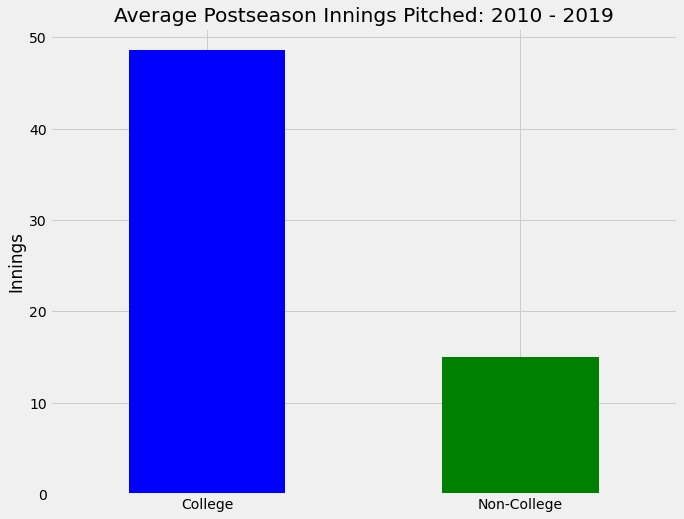

In [15]:
innings.plot.bar(title = 'Average Postseason Innings Pitched: 2010 - 2019', rot = 0, figsize = (10,8), color = colors)
plt.style.use('fivethirtyeight')
plt.xlabel('')
plt.ylabel('Innings')
plt.show()

## Postseason Appearances

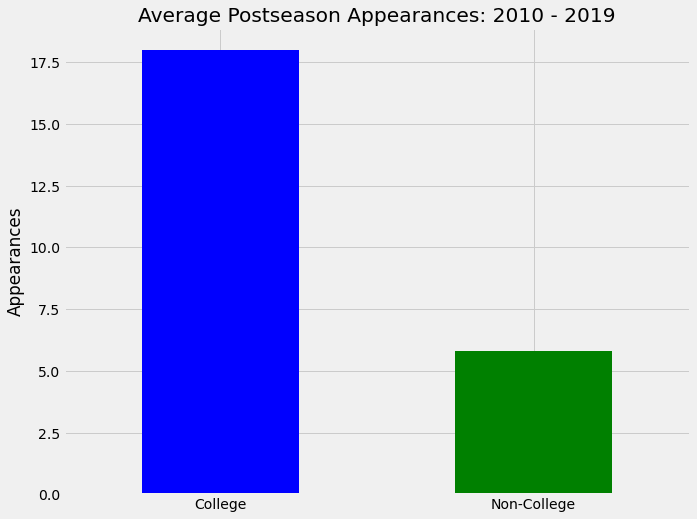

In [16]:
games.plot.bar(title = 'Average Postseason Appearances: 2010 - 2019', rot=0, figsize = (10,8), color = colors)
plt.style.use('fivethirtyeight')
plt.xlabel('')
plt.ylabel("Appearances")
plt.show()

## Postseason Starts

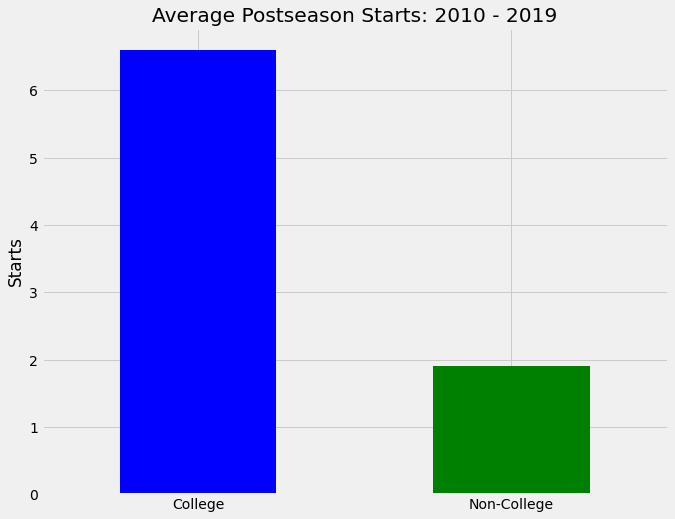

In [17]:
starts.plot.bar(title = 'Average Postseason Starts: 2010 - 2019', rot=0, figsize = (10,8), color = colors)
plt.style.use('fivethirtyeight')
plt.xlabel('')
plt.ylabel('Starts')
plt.show()

## Analysis



After reviewing the results, there are a few points to be made. While high school level pitchers outnumber their college counterparts by a decent number, any edge they have appears to end there.

Perhaps the most surprising results from this analysis comes from the innings pitched, game appearances and games        started categories. Despite being outnumbered, the difference in favor of college pitchers is significant. The average collegiate level pitcher outperforms their counterparts by **more than three times** in each of these categories.

This could infer that pitchers coming from college are better prepared to log a higher workload than those coming right from high school (in the form of starting games). It could also mean that they are better equipped to handle the pressures that come with every pitch in postseason baseball by playing at the collegiate level.

MLB pitchers from college average a slightly lower postseason opponent batting average statistic, and show a slightly larger edge in ERA. This is worth noting because we know that college level pitchers throw more innings, appear in more games and make more starts in recent postseasons. 

For the college group to showcase better numbers while playing three times more in the biggest stages of the game is impressive.